<a href="https://colab.research.google.com/github/atvrai/ML_Implementation_2025/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
elikplim_car_evaluation_data_set_path = kagglehub.dataset_download('elikplim/car-evaluation-data-set')

print('Data source import complete.')


<a class="anchor" id="0"></a>
# **Decision Tree Classifier Tutorial with Python**


Hello friends,

In this kernel, I build a Decision Tree Classifier to predict the safety of the car. I build two models, one with criterion `gini index` and another one with criterion `entropy`. I implement Decision Tree Classification with Python and Scikit-Learn.

**As always, I hope you find this kernel useful and your <font color="red"><b>UPVOTES</b></font> would be highly appreciated**.

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Introduction to Decision Tree algorithm](#1)
2.	[Classification and Regression Trees](#2)
3.	[Decision Tree algorithm terminology](#3)
4.	[Decision Tree algorithm intuition](#4)
5.	[Attribute selection measures](#5)
    - 5.1 [Information gain](#5.1)
    - 5.2 [Gini index](#5.2)
6.	[Overfitting in Decision-Tree algorithm](#6)
7.	[Import libraries](#7)
8.	[Import dataset](#8)
9.	[Exploratory data analysis](#9)
10.	[Declare feature vector and target variable](#10)
11.	[Split data into separate training and test set](#11)
12.	[Feature engineering](#12)
13.	[Decision Tree classifier with criterion gini-index](#13)
14.	[Decision Tree classifier with criterion entropy](#14)
15.	[Confusion matrix](#15)
16.	[Classification report](#16)
17.	[Results and conclusion](#17)
18. [References](#18)


# **1. Introduction to Decision Tree algorithm** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.


A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.


We make some assumptions while implementing the Decision-Tree algorithm. These are listed below:-

1. At the beginning, the whole training set is considered as the root.
2. Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
3. Records are distributed recursively on the basis of attribute values.
4. Order to placing attributes as root or internal node of the tree is done by using some statistical approach.


I will describe Decision Tree terminology in later section.


# **2. Classification and Regression Trees (CART)** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


Nowadays, Decision Tree algorithm is known by its modern name **CART** which stands for **Classification and Regression Trees**. Classification and Regression Trees or **CART** is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification and regression modeling problems.


The CART algorithm provides a foundation for other important algorithms like bagged decision trees, random forest and boosted decision trees. In this kernel, I will solve a classification problem. So, I will refer the algorithm also as Decision Tree Classification problem.


# **3. Decision Tree algorithm terminology** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


- In a Decision Tree algorithm, there is a tree like structure in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The paths from the root node to leaf node represent classification rules.

- We can see that there is some terminology involved in Decision Tree algorithm. The terms involved in Decision Tree algorithm are as follows:-


## **Root Node**

- It represents the entire population or sample. This further gets divided into two or more homogeneous sets.


## **Splitting**

- It is a process of dividing a node into two or more sub-nodes.


## Decision Node

- When a sub-node splits into further sub-nodes, then it is called a decision node.


## Leaf/Terminal Node

- Nodes that do not split are called Leaf or Terminal nodes.


## Pruning

- When we remove sub-nodes of a decision node, this process is called pruning. It is the opposite process of splitting.


## Branch/Sub-Tree

- A sub-section of an entire tree is called a branch or sub-tree.


## Parent and Child Node

- A node, which is divided into sub-nodes is called the parent node of sub-nodes where sub-nodes are the children of a parent node.


The above terminology is represented clearly in the following diagram:-

### Decision-Tree terminology

![Decision-Tree terminology](https://gdcoder.com/content/images/2019/05/Screen-Shot-2019-05-18-at-03.40.41.png)

# **4. Decision Tree algorithm intuition** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks. The intuition behind the Decision-Tree algorithm is very simple to understand.


The Decision Tree algorithm intuition is as follows:-


1.	For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node.

2.	For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

3.	This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.


# **5. Attribute selection measures** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)


The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the **attributes selection**. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.


There are 2 popular attribute selection measures. They are as follows:-


- **Information gain**

- **Gini index**


While using **Information gain** as a criterion, we assume attributes to be categorical and for **Gini index** attributes are assumed to be continuous. These attribute selection measures are described below.


## **5.1 Information gain** <a class="anchor" id="5.1"></a>

[Table of Contents](#0.1)


By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called **Entropy**.

## **Entropy**

Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. **Information gain** is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

Entropy is represented by the following formula:-




![Entropy](http://www.learnbymarketing.com/wp-content/uploads/2016/02/entropy-formula.png)



Here, **c** is the number of classes and **pi** is the probability associated with the ith class.

The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in **entropy measure** of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node.

## **5.2 Gini index** <a class="anchor" id="5.2"></a>

[Table of Contents](#0.1)


Another attribute selection measure that **CART (Categorical and Regression Trees)** uses is the **Gini index**. It uses the Gini method to create split points.


Gini index can be represented with the following diagram:-

## **Gini index**

![Gini index](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s)


Here, again **c** is the number of classes and **pi** is the probability associated with the ith class.

Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.

It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

Steps to Calculate Gini for a split

1.	Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure (p^2+q^2).

2.	Calculate Gini for split using weighted Gini score of each node of that split.


In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. The attribute with minimum Gini index is chosen as the splitting attribute.

# **6. Overfitting in Decision Tree algorithm** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)


Overfitting is a practical problem while building a Decision-Tree model. The problem of overfitting is considered when the algorithm continues to go deeper and deeper to reduce the training-set error but results with an increased test-set error. So, accuracy of prediction for our model goes down. It generally happens when we build many branches due to outliers and irregularities in data.

Two approaches which can be used to avoid overfitting are as follows:-

- Pre-Pruning

- Post-Pruning


## **Pre-Pruning**

In pre-pruning, we stop the tree construction a bit early. We prefer not to split a node if its goodness measure is below a threshold value. But it is difficult to choose an appropriate stopping point.


## **Post-Pruning**

In post-pruning, we go deeper and deeper in the tree to build a complete tree. If the tree shows the overfitting problem then pruning is done as a post-pruning step. We use the cross-validation data to check the effect of our pruning. Using cross-validation data, we test whether expanding a node will result in improve or not. If it shows an improvement, then we can continue by expanding that node. But if it shows a reduction in accuracy then it should not be expanded. So, the node should be converted to a leaf node.

# **7. Import libraries** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **8. Import dataset** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In [ ]:
data = '/kaggle/input/car-evaluation-data-set/car_evaluation.csv'
df = pd.read_csv(data , header=None)

# **9. Exploratory data analysis** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)


Now, I will explore the data to gain insights about the data.

In [ ]:
# view dimensions of dataset
df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

In [ ]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
# let's again preview the dataset
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

#counting the frequency of types of datas in each column of the dataset
for col in col_names:
    print(df[col].value_counts())


high     432
med      432
low      432
vhigh    432
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    432
Name: maint, dtype: int64
3        432
5more    432
4        432
2        432
Name: doors, dtype: int64
more    576
4       576
2       576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
high    576
med     576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the `doors` and `persons` are categorical in nature. So, I will treat them as categorical variables.

### Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.


- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.


- `class` is the target variable.

### Explore `class` variable

In [ ]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

Note that the datatype of the entries is in int64 but in decission trees all calculations are done in float32/64

The `class` target variable is ordinal in nature.

### Missing values in variables

In [ ]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

# **10. Declare feature vector and target variable** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

In [ ]:
X = df.drop(['class'], axis=1) #axis =1 specifies the we drop the entire col
#for training on the input we need to drop the output column for X
y = df['class']

# **11. Split data into separate training and test set** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1209, 6), (519, 6))

# **12. Feature Engineering** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First,check the data types of variables again.

In [ ]:
# check data types in X_train we get to see the datatypes used in this to train this
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Encode categorical variables


Now, I will encode the categorical variables.

In [ ]:
X_train.head() #see till now we have categories in our data set like high vhigh low etc...but to feed it to our datset we need to encode it..

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


We can see that all  the variables are ordinal categorical data type.

In [ ]:
# import category encoders from sklearn

import category_encoders as ce

fit() part: The transformer learns the parameters required for the transformation from the data, $\text{X\_train}$.

transform() part: The transformer then applies this learned mapping (the assigned ranks) to the same data, X_train, converting the categorical values into numerical codes.

This method is typically used only on the training data (X_train) to both learn the necessary mapping and perform the transformation simultaneously.

Training Data: You want the encoder to learn the complete set of categories and their corresponding numerical codes from the training set:

Python

X_train = encoder.fit_transform(X_train) # Learn categories (fit) AND apply codes (transform)
Test Data: You must use the exact same category-to-code mapping learned from the training data on the test set. If you used fit_transform on X_test, the encoder would learn a new mapping based on the categories present only in X_test, which could lead to inconsistent encoding and a biased evaluation of your model's performance on unseen data.

In [ ]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [ ]:
X_test.head() #same leraning used but only tranformations done here..

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,3,3,1
1201,1,4,4,1,3,3
628,2,2,1,3,1,3
1498,3,2,1,1,3,3
1263,1,4,3,2,3,2


We now have training and test set ready for model building.

# **13. Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier


In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### Predict the Test set results with criterion gini index

In [ ]:
#preict outputs on the test_dataset
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7592


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini #print the predictions
np.unique(y_pred_train_gini) #output preds as -1 , 1

array(['acc', 'unacc'], dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7767


### Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set .format to predict the accuracy for this..

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7767
Test set score: 0.7592


Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.


### Visualize decision-trees

[Text(418.5, 475.65000000000003, 'X[3] <= 2.5\ngini = 0.452\nsamples = 1209\nvalue = [266, 50, 852, 41]'),
 Text(334.8, 339.75, 'X[5] <= 1.5\ngini = 0.571\nsamples = 816\nvalue = [266, 50, 459, 41]'),
 Text(167.4, 203.85000000000002, 'X[0] <= 3.5\ngini = 0.627\nsamples = 273\nvalue = [147, 21, 64, 41]'),
 Text(83.7, 67.94999999999999, 'gini = 0.615\nsamples = 203\nvalue = [114, 21, 27, 41]'),
 Text(251.10000000000002, 67.94999999999999, 'gini = 0.498\nsamples = 70\nvalue = [33, 0, 37, 0]'),
 Text(502.20000000000005, 203.85000000000002, 'X[5] <= 2.5\ngini = 0.42\nsamples = 543\nvalue = [119, 29, 395, 0]'),
 Text(418.5, 67.94999999999999, 'gini = 0.0\nsamples = 274\nvalue = [0, 0, 274, 0]'),
 Text(585.9, 67.94999999999999, 'gini = 0.59\nsamples = 269\nvalue = [119, 29, 121, 0]'),
 Text(502.20000000000005, 339.75, 'gini = 0.0\nsamples = 393\nvalue = [0, 0, 393, 0]')]

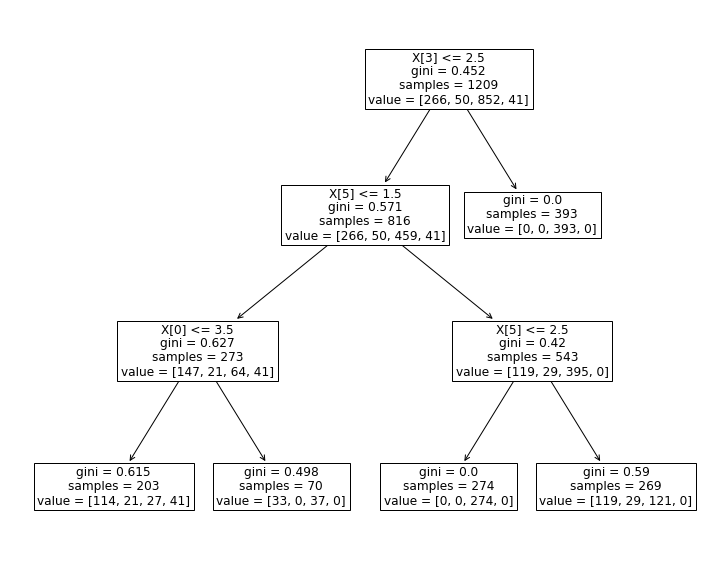

In [ ]:
plt.figure(figsize=(12,10))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

### Visualize decision-trees with graphviz

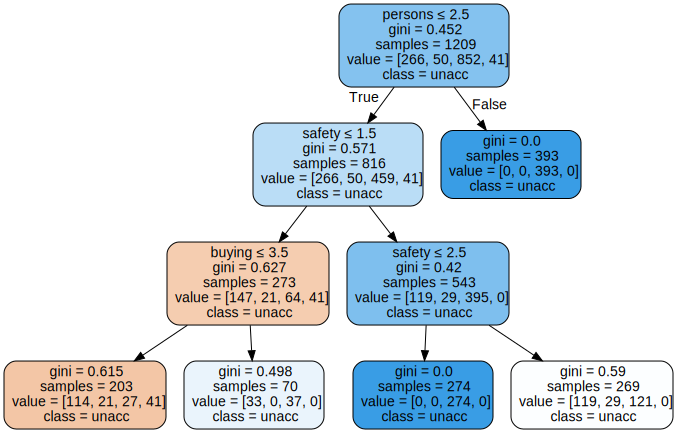

In [ ]:
import graphviz
tree_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(tree_data)
graph

# **14. Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### Predict the Test set results with criterion entropy

In [ ]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8189


### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['acc', 'unacc', 'acc', ..., 'acc', 'unacc', 'acc'], dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8180


### Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8180
Test set score: 0.8189


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.


### Visualize decision-trees

[Text(418.50000000000006, 391.392, 'X[3] <= 2.5\nentropy = 1.192\nsamples = 1209\nvalue = [266, 50, 852, 41]'),
 Text(362.70000000000005, 304.416, 'X[5] <= 1.5\nentropy = 1.458\nsamples = 816\nvalue = [266, 50, 459, 41]'),
 Text(223.20000000000002, 217.44, 'X[0] <= 3.5\nentropy = 1.667\nsamples = 273\nvalue = [147, 21, 64, 41]'),
 Text(111.60000000000001, 130.464, 'X[4] <= 1.5\nentropy = 1.659\nsamples = 203\nvalue = [114, 21, 27, 41]'),
 Text(55.800000000000004, 43.488, 'entropy = 1.35\nsamples = 65\nvalue = [31, 0, 6, 28]'),
 Text(167.4, 43.488, 'entropy = 1.589\nsamples = 138\nvalue = [83, 21, 21, 13]'),
 Text(334.8, 130.464, 'X[1] <= 1.5\nentropy = 0.998\nsamples = 70\nvalue = [33, 0, 37, 0]'),
 Text(279.0, 43.488, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0]'),
 Text(390.6, 43.488, 'entropy = 0.867\nsamples = 52\nvalue = [15, 0, 37, 0]'),
 Text(502.20000000000005, 217.44, 'X[5] <= 2.5\nentropy = 1.04\nsamples = 543\nvalue = [119, 29, 395, 0]'),
 Text(446.40000000000003, 130

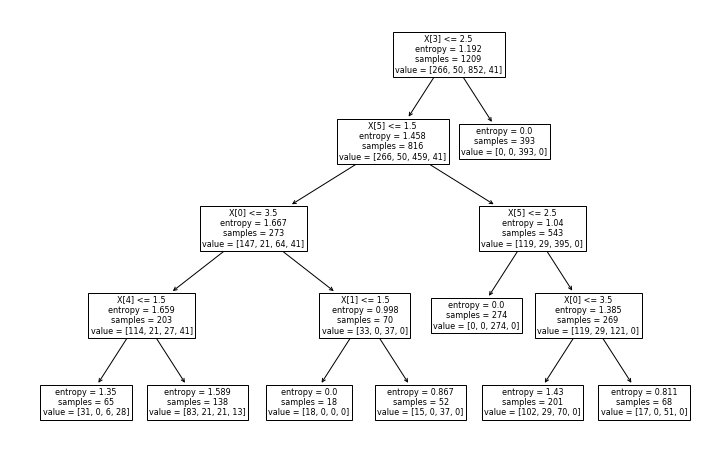

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

### Visualize decision-trees with graphviz

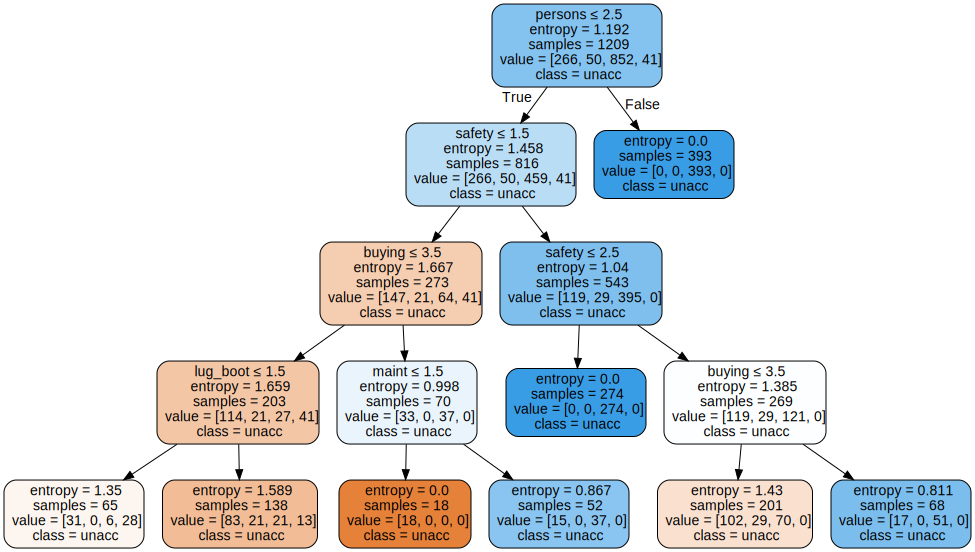

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.


We have another tool called `Confusion matrix` that comes to our rescue.

# **15. Confusion matrix** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[101   0  17   0]
 [ 19   0   0   0]
 [ 34   0 324   0]
 [ 24   0   0   0]]


# **16. Classification Report** <a class="anchor" id="16"></a>

[Table of Contents](#0.1)


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.57      0.86      0.68       118
        good       0.00      0.00      0.00        19
       unacc       0.95      0.91      0.93       358
       vgood       0.00      0.00      0.00        24

    accuracy                           0.82       519
   macro avg       0.38      0.44      0.40       519
weighted avg       0.78      0.82      0.79       519



# # ADDITION OF PRUNIG TO THE DEISSION TREE

In [ ]:
# Import the necessary functions if you plan to find the optimal alpha
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split, cross_val_score

# Add ccp_alpha for post-pruning, and min_samples_split/min_samples_leaf for pre-pruning

clf_en_pruned = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,                # Pre-pruning: Stop deep growth
    min_samples_split=5,        # Pre-pruning: Require 5 samples to split a node
    min_samples_leaf=3,         # Pre-pruning: Require 3 samples at a leaf
    random_state=0
)

# fit the new pruned model
clf_en_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [ ]:
y_pred_en_pruned = clf_en_pruned.predict(X_test)


Now predict the accuracy of the pruned model

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en_pruned)))

Model accuracy score with criterion entropy: 0.8189


In [ ]:
print('Training set score: {:.4f}'.format(clf_en_pruned.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en_pruned.score(X_test, y_test)))

Training set score: 0.8180
Test set score: 0.8189


[Text(418.50000000000006, 587.0880000000001, 'X[3] <= 2.5\nentropy = 1.192\nsamples = 1209\nvalue = [266, 50, 852, 41]'),
 Text(362.70000000000005, 456.624, 'X[5] <= 1.5\nentropy = 1.458\nsamples = 816\nvalue = [266, 50, 459, 41]'),
 Text(223.20000000000002, 326.1600000000001, 'X[0] <= 3.5\nentropy = 1.667\nsamples = 273\nvalue = [147, 21, 64, 41]'),
 Text(111.60000000000001, 195.69600000000003, 'X[4] <= 1.5\nentropy = 1.659\nsamples = 203\nvalue = [114, 21, 27, 41]'),
 Text(55.800000000000004, 65.23200000000008, 'entropy = 1.35\nsamples = 65\nvalue = [31, 0, 6, 28]'),
 Text(167.4, 65.23200000000008, 'entropy = 1.589\nsamples = 138\nvalue = [83, 21, 21, 13]'),
 Text(334.8, 195.69600000000003, 'X[1] <= 1.5\nentropy = 0.998\nsamples = 70\nvalue = [33, 0, 37, 0]'),
 Text(279.0, 65.23200000000008, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0]'),
 Text(390.6, 65.23200000000008, 'entropy = 0.867\nsamples = 52\nvalue = [15, 0, 37, 0]'),
 Text(502.20000000000005, 326.1600000000001, 'X[5]

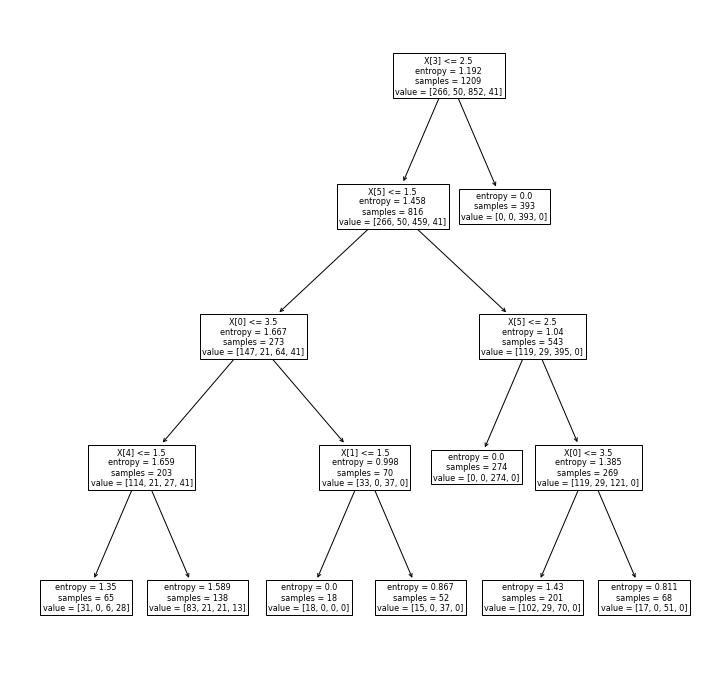

In [ ]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf_en_pruned.fit(X_train , y_train))

# from sklearn import tree
# tree.plot_tree(clf_en.fit(X_train, y_train))

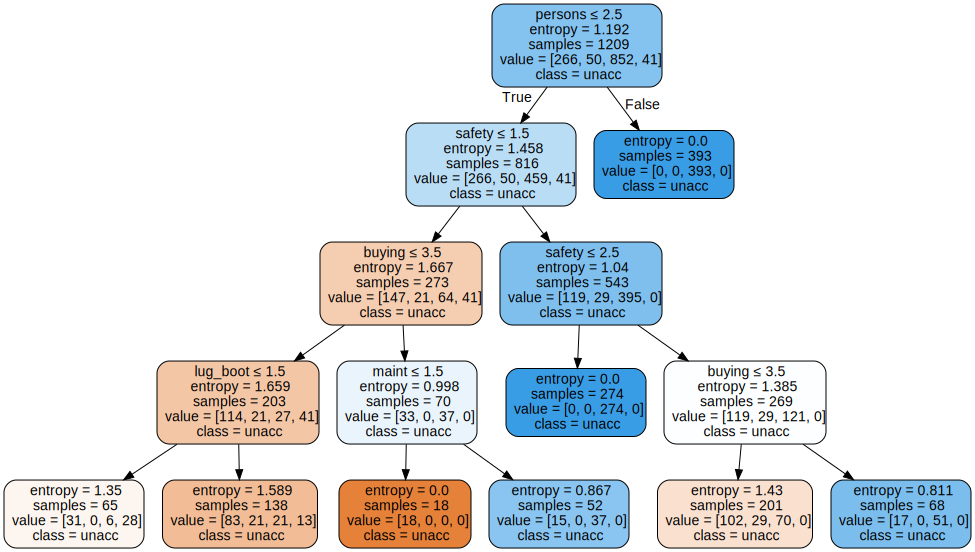

In [ ]:
pruned_tree = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)
graph = graphviz.Source(pruned_tree)
graph

NOW YOU CAN MESS AROUND WITH THE MAX DEPTH AND TRE PRUNING PARAMETERS TO SEE THE CANHING TREE AND ALSO FROM THIS
NOTE THIS IS NOT HOW WE ACTUALLY SELECT THE MODEL PARAMETRERS WE USE A CROSS VALIDATION ALONGSIDE TO SELECT PROPER PARAMETERS

# **17. Results and conclusion** <a class="anchor" id="17"></a>

[Table of Contents](#0.1)


1.	In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion `gini index` and another one with criterion `entropy`. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8021.
2.	In the model with criterion `gini index`, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.
3.	Similarly, in the model with criterion `entropy`, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021.We get the same values as in the case with criterion `gini`. So, there is no sign of overfitting.
4.	In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
5.	The confusion matrix and classification report yields very good model performance.

# **18. References** <a class="anchor" id="18"></a>

[Table of Contents](#0.1)


The work done in this project is inspired from following books and websites:-

1. Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

2. Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

3. https://en.wikipedia.org/wiki/Decision_tree

4. https://en.wikipedia.org/wiki/Information_gain_in_decision_trees

5. https://en.wikipedia.org/wiki/Entropy_(information_theory)

6. https://www.datacamp.com/community/tutorials/decision-tree-classification-python

7. https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

8. https://acadgild.com/blog/decision-tree-python-code


So, now we will come to the end of this kernel.

I hope you find this kernel useful and enjoyable.

Your comments and feedback are most welcome.

Thank you


[Go to Top](#0)